Scipy:
We have the min and max temperatures in a city In India for each months of the year.

We would like to find a function to describe this and show it graphically, the dataset

given below.

Task:
    
1. fitting it to the periodic function

2. plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]

Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

max_temp = np.array(Max)
min_temp = np.array(Min)

months = np.arange(1,13,1)
months



array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0, 0.5, 'Temperature')

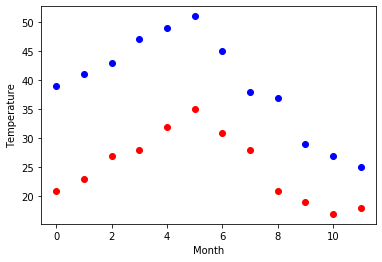

In [41]:
plt.plot(months,max_temp, 'bo')
plt.plot(months, min_temp, 'ro')
plt.xlabel('Month')
plt.ylabel('Temperature')

##### Creating a periodic function to fit the curve

In [34]:

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

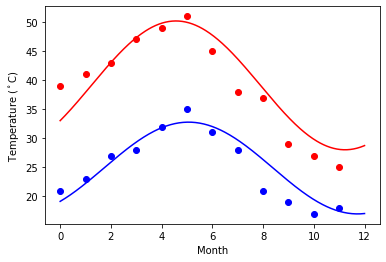

In [43]:
day_num = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(day_num, yearly_temps(day_num, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(day_num, yearly_temps(day_num, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()